In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [30]:
data=pd.read_csv('DOGE-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [31]:
# check correlation
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [32]:
# converting the string date and time in proper date and time format
# with the help of pandas

data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)
data.set_index('Date',inplace=True)
data.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [33]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [34]:
#  check for null values in the dataset
data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [35]:
#Dropping the missing values
data.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...
2022-08-30,0.063899,0.064408,0.060550,0.061525,0.061525,328934727.0
2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0


In [36]:
#statistical analysis of data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

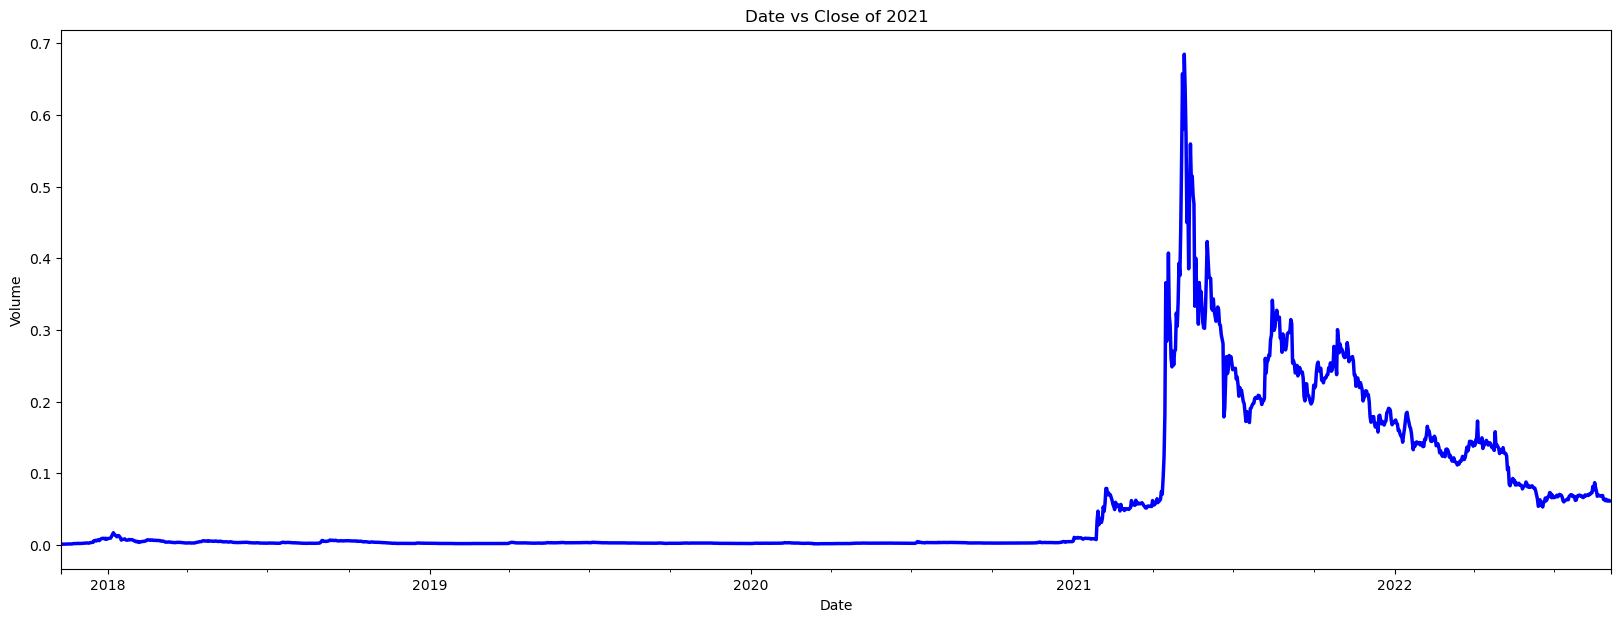

In [37]:
# first we will  analyse the closing price as we need it to perform the prediciton
plt.figure(figsize=(20,7))
x=data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5,color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

In [38]:
# The column ‘Close’ is our predicted feature. 
#We are taking different factors from the predefined factors for our own calculation and naming them suitably.
#Also, we are checking each factor while correlating with the ‘Close’ column while sorting it in descending order.

In [39]:
data["gap"]=(data["High"]-data["Low"])*data["Volume"]
data["y"]=data["High"]/data["Volume"]
data["z"]=data["Low"]/data["Volume"]
data["a"]=data["High"]/data["Low"]
data["b"]=(data["High"]/data["Low"])*data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

In [40]:
#By, observing the correlating factors, 
#we can choose a few of them. 
#We are excluding High, Low, and Open as they are highly correlated from the beginning.

In [41]:
data=data[["Close","Volume","gap","a","b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [42]:
 #for Time Series Analysis. 
# ARIMA stands for autoregressive integrated moving average model and is specified
#by three order parameters: (p, d, q) where AR stands for Autoregression i.e. p, I stands for Integration i.e. d, MA stands for Moving Average 
#i.e. q. Whereas, SARIMAX is Seasonal ARIMA with exogenous variables.

In [43]:
df2=data.tail(30)
train=df2[:11]
test=df2[-19:]
print(train.shape,test.shape)

(11, 5) (19, 5)


In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  32.463
Date:                Fri, 14 Jul 2023   AIC                            -48.926
Time:                        16:12:44   BIC                            -46.506
Sample:                    08-06-2022   HQIC                           -51.582
                         - 08-16-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      9.311e-11   3.02e-11      3.085      0.002     3.4e-11    1.52e-10
gap          2.21e-09   4.26e-10      5.190      0.000    1.38e-09    3.04e-09
a             -0.0066   2.11e-14  -3.13e+11      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
#Now, observe the prediction in time series.
start = 11
end = 29
predictions = results.predict(
    start=start,
    end=end,
    exog=test.drop("Close", axis=1))
predictions

MissingDataError: exog contains inf or nans

NameError: name 'predictions' is not defined

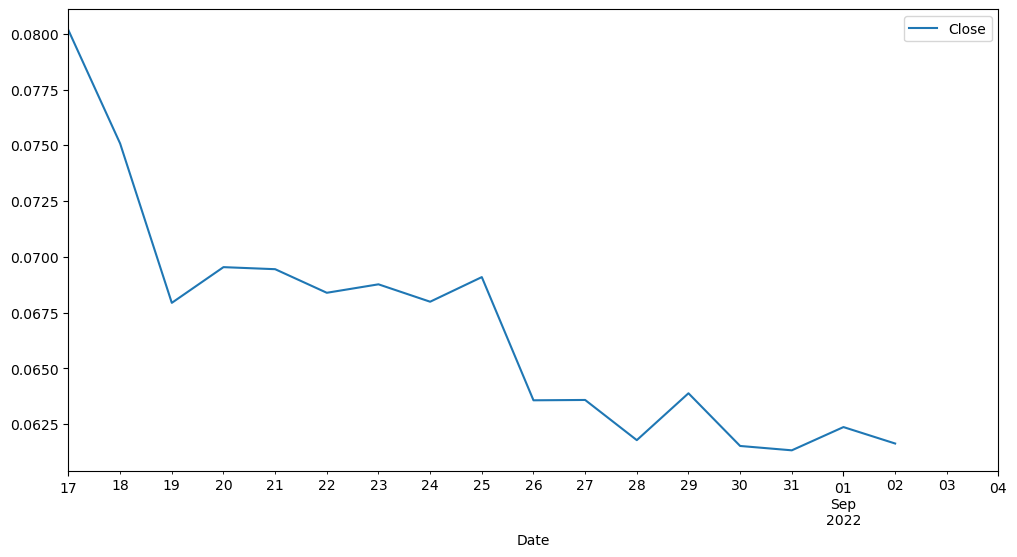

In [46]:
#Finally, plot the prediction to get a visualization.
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)